In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle 

In [6]:
df_rest = pd.read_csv('rest.csv', sep= ";")
df_rest

,Fahrerlaubnis,Regional_Code,Vorversicherung,Alter_Fzg,Vorschaden,Jahresbeitrag,Vertriebskanal,Kundentreue,id
0,1,15.0,1,1-2 Year,No,2630.0,124.0,74,317635
1,1,28.0,0,1-2 Year,Yes,2630.0,125.0,213,337993
2,1,33.0,0,1-2 Year,Yes,27204.0,124.0,114,160325
3,1,46.0,1,< 1 Year,No,31999.0,152.0,251,141620
4,1,49.0,0,1-2 Year,Yes,28262.0,26.0,60,75060
...,...,...,...,...,...,...,...,...,...
508141,1,15.0,1,< 1 Year,No,39130.0,152.0,215,467830
508142,1,36.0,1,< 1 Year,No,59649.0,160.0,104,163752
508143,1,28.0,0,1-2 Year,Yes,45937.0,157.0,119,364306
508144,1,11.0,0,1-2 Year,Yes,22359.0,26.0,41,388110


In [7]:
df_ag = pd.read_csv('alter_geschlecht.csv', sep= ",")
df_ag

,id,Geschlecht,Alter
0,170727,Male,42
1,41795,Male,24
2,369321,Female,30
3,500463,Female,32
4,327695,Male,34
...,...,...,...
508141,180256,Male,29
508142,233153,Male,29
508143,53459,Female,35
508144,494977,Female,45


In [8]:
print(df_ag['id'].duplicated().sum())

0


In [9]:
df_ziel = pd.read_csv('interesse.csv', sep= ",")
df_ziel

,id,Interesse
0,1,1.0
1,2,0.0
2,3,1.0
3,4,0.0
4,5,0.0
...,...,...
381104,381105,0.0
381105,381106,0.0
381106,381107,0.0
381107,381108,0.0


In [10]:
df_merg1 = pd.merge(df_rest, df_ag, on = 'id', how = 'inner')
df = pd.merge(df_merg1, df_ziel, on = 'id', how = 'inner')
df

,Fahrerlaubnis,Regional_Code,Vorversicherung,Alter_Fzg,Vorschaden,Jahresbeitrag,Vertriebskanal,Kundentreue,id,Geschlecht,Alter,Interesse
0,1,15.0,1,1-2 Year,No,2630.0,124.0,74,317635,Male,76,0.0
1,1,28.0,0,1-2 Year,Yes,2630.0,125.0,213,337993,Male,43,0.0
2,1,33.0,0,1-2 Year,Yes,27204.0,124.0,114,160325,Male,20,0.0
3,1,46.0,1,< 1 Year,No,31999.0,152.0,251,141620,Male,24,0.0
4,1,49.0,0,1-2 Year,Yes,28262.0,26.0,60,75060,Male,51,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,12.0,1,< 1 Year,No,26745.0,160.0,153,130942,Female,22,0.0
381105,1,33.0,0,> 2 Years,Yes,40301.0,124.0,166,295763,Female,42,0.0
381106,1,36.0,1,< 1 Year,No,59649.0,160.0,104,163752,Female,26,0.0
381107,1,28.0,0,1-2 Year,Yes,45937.0,157.0,119,364306,Male,45,0.0


## Datenanalyse alle Daten 

In [11]:
print(df['id'].duplicated().sum())
print(df.isna().sum())

0
Fahrerlaubnis      0
Regional_Code      0
Vorversicherung    0
Alter_Fzg          0
Vorschaden         0
Jahresbeitrag      0
Vertriebskanal     0
Kundentreue        0
id                 0
Geschlecht         0
Alter              0
Interesse          0
dtype: int64


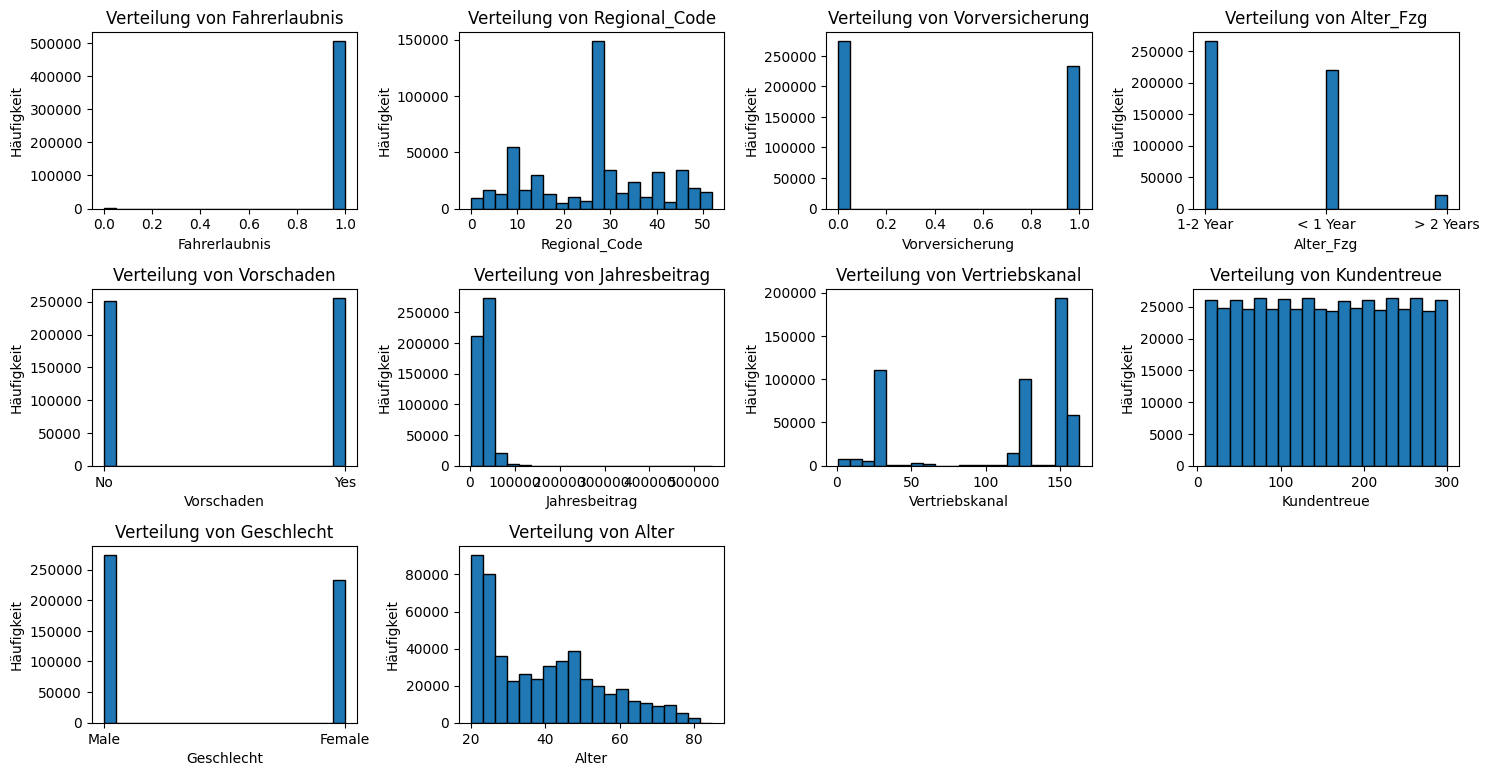

In [12]:
#hier wird der Merge aus der Rest und Alter Tabelle genommen, da im letzten merge daten verloren gehen aufgrund des innerjoins.
#es wird mit beiden mengen ausgeführt um zu sehen ob der datensatz verzogen wird aufgrund der "fehlenden Labels"
features = df_merg1.columns
features = features.drop('id')

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features): #erstellt für jedes Feature ein Diagramm
    plt.subplot(4, 4, i + 1) 
    plt.hist(df_merg1[feature], bins=20, edgecolor='black')
    plt.title(f"Verteilung von {feature}")
    plt.xlabel(feature)
    plt.ylabel('Häufigkeit')

plt.tight_layout()  
plt.show()

## Datenanalyse Labeled-Data

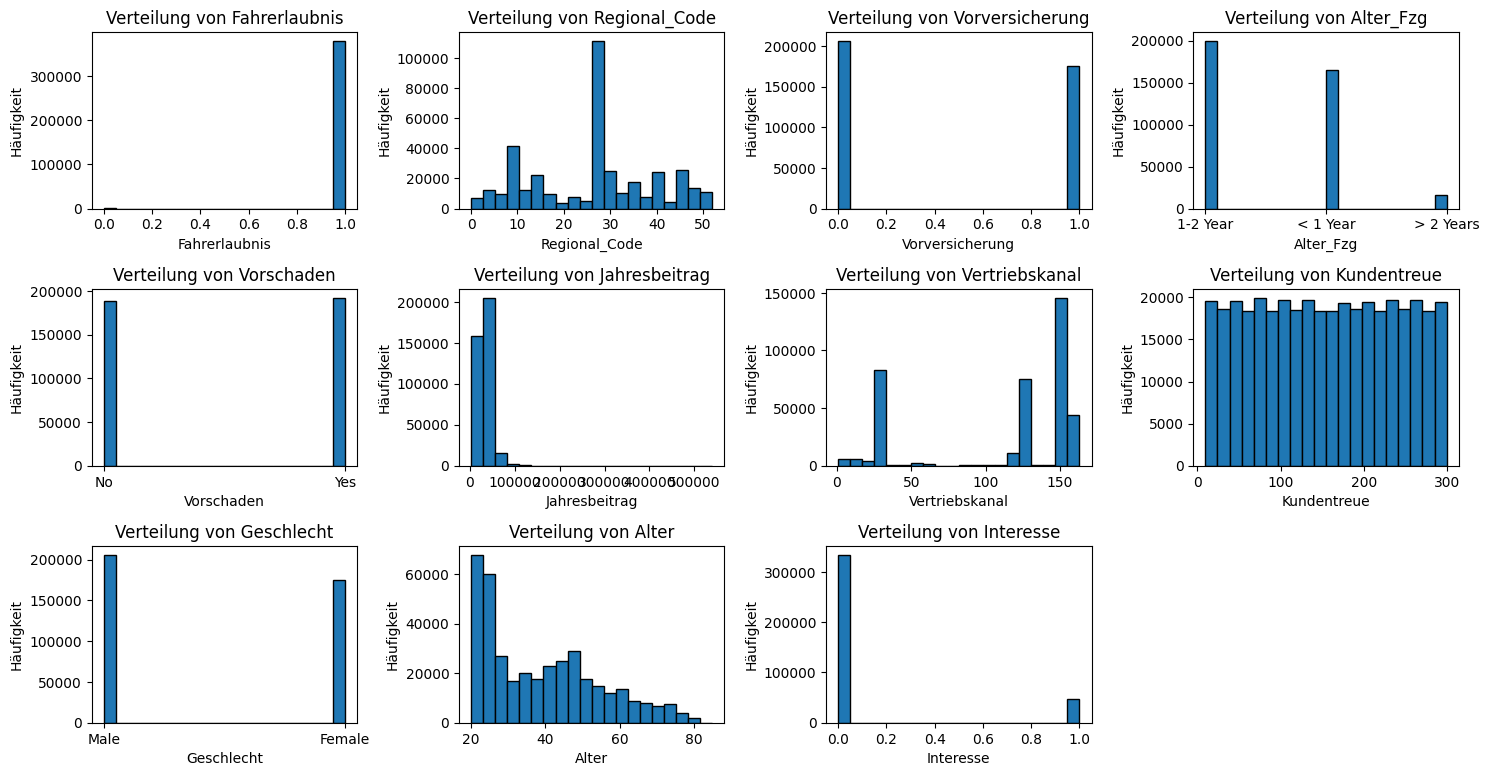

In [13]:
# Hier will ich mir noch die Verteilungen auf der klasse 1 anschauen
import matplotlib.pyplot as plt


features = df.columns
features = features.drop('id')

# Erstelle ein kleines Diagramm für jedes Feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1) 
    plt.hist(df[feature], bins=20, edgecolor='black')
    plt.title(f"Verteilung von {feature}")
    plt.xlabel(feature)
    plt.ylabel('Häufigkeit')

plt.tight_layout()  # Optimiert das Layout der Diagramme
plt.show()


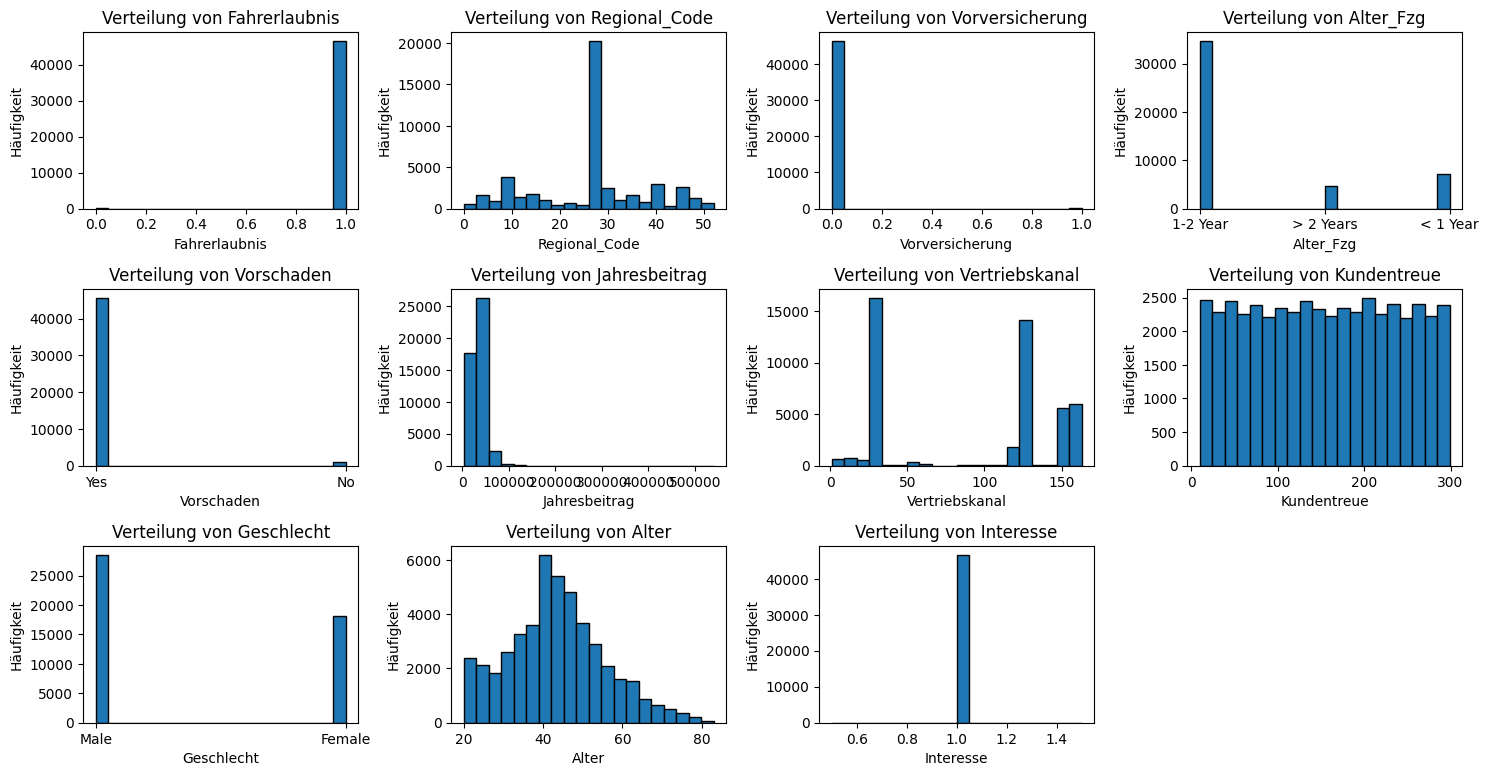

In [14]:
df_red = df[df['Interesse'] == 1]

features = df_red.columns
features = features.drop('id')

# Erstelle ein kleines Diagramm für jedes Feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1) 
    plt.hist(df_red[feature], bins=20, edgecolor='black')
    plt.title(f"Verteilung von {feature}")
    plt.xlabel(feature)
    plt.ylabel('Häufigkeit')

plt.tight_layout()  # Optimiert das Layout der Diagramme
plt.show()

In [15]:
df.to_pickle('daten.pkl')

3


### Vertriebskanal, regional_code -> Nominal => One Hot Encoding oder als zahlen lassen bzw umwandeln (möglicherweise problematisch, weil rangfolge gebildet werden könnte)
### Geschlech, Fahrerlaubnis, Vorversicherung, Vorschaden -> Binär 
### rest ist Kardinal skaliert 
### AlterFzg ist ein String --> muss in zahl umgewandelt werden, ist allerdings auch Kardinal-sakliert, d.h. es kann eine rangfolge gebildet werden
### Interesse -> Zielvar
### Interesse nicht Balanciert -> over/undersampling

### Korrelationen plotten wenn features bearbeitet sind, stirn in int usw.

### Binäre Klassifikation auf interesse, Logreg  / gBoosting 

### Sehr viele Jüngere Personen in den Daten (bias) allerdings "normal" verteilt in klasse 1. 
 
